# Final Project : - Building two Recommendation Systems

# Part : - 1

# Collaborative Filtering-based Recommender using Matrix Factorization Technique.

## Data Preperation

In [83]:
# Installing required libraries 

In [60]:
pip install pandas numpy scikit-learn matplotlib plotly seaborn torch requests tweepy nltk nitter vaderSentiment



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np

In [62]:
import pandas as pd

# Load u.data and u.item datasets
u_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.data.csv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
u_item = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')


In [63]:
u_data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [64]:
u_item.head(20)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Dropping the NAN value column

In [65]:
u_item = u_item.drop('video_release_date', axis=1)

In [66]:
u_item.head(10)

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Building Collaborative Filtering-Based Recommender using Matrix Factorization Model

#### Creating a user-item rating matrix

In [67]:
num_users = u_data.user_id.unique().shape[0]
num_items = u_data.item_id.unique().shape[0]
R = np.zeros((num_users, num_items))

for row in u_data.itertuples():
    R[row.user_id - 1, row.item_id - 1] = row.rating

print(f"User-Item Matrix: \n{R}")


User-Item Matrix: 
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


#### Display the user-item rating matrix with zeros for missing ratings

In [68]:
print("User-Item Matrix with Missing Ratings (0s indicate missing ratings):")
R_df = pd.DataFrame(R, columns=[f'Item {i+1}' for i in range(num_items)], index=[f'User {i+1}' for i in range(num_users)])
print(R_df)

User-Item Matrix with Missing Ratings (0s indicate missing ratings):
          Item 1  Item 2  Item 3  Item 4  Item 5  Item 6  Item 7  Item 8  \
User 1       5.0     3.0     4.0     3.0     3.0     5.0     4.0     1.0   
User 2       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 5       4.0     3.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
User 939     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 940     0.0     0.0     0.0     2.0     0.0     0.0     4.0     5.0   
User 941     5.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
User 942     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 943     0.0     5.0     0.0     0.0     0.0     0.0     0.0     0.0   

          Item 9  

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        # Initialize the MatrixFactorization model
        self.R = R  # User-item rating matrix
        self.num_users, self.num_items = R.shape  # Number of users and items
        self.K = K  # Number of latent factors
        self.alpha = alpha  # Learning rate
        self.beta = beta  # Regularization parameter
        self.iterations = iterations  # Number of iterations

    def train(self):
        # Initialize user and item latent feature matrices with random values
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize biases
        self.b_u = np.zeros(self.num_users)  # User biases
        self.b_i = np.zeros(self.num_items)  # Item biases
        self.b = np.mean(self.R[np.where(self.R != 0)])  # Global bias

        # Create a list of known ratings
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training process
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()  # Perform stochastic gradient descent
            rmse = self.rmse()  # Compute RMSE
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        # Perform stochastic gradient descent
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)  # Predicted rating
            e = (r - prediction)  # Prediction error

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        # Compute predicted rating
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        # Compute RMSE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        # Compute MAE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def precision_recall_f1(self, threshold=3.5):
        # Compute Precision, Recall, and F1-Score
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix

        y_true = []
        y_pred = []

        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        return precision, recall, f1

    def full_matrix(self):
        # Compute full predicted ratings matrix
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + self.P.dot(self.Q.T)


# R is already defined as the user-item rating matrix
mf = MatrixFactorization(R, K=20, alpha=0.001, beta=0.001, iterations=50) 
training_process = mf.train()

# Evaluate the model
rmse = mf.rmse()
mae = mf.mae()
precision, recall, f1 = mf.precision_recall_f1()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Iteration: 1 ; error = 1.0675
Iteration: 2 ; error = 1.0341
Iteration: 3 ; error = 1.0126
Iteration: 4 ; error = 0.9978
Iteration: 5 ; error = 0.9868
Iteration: 6 ; error = 0.9784
Iteration: 7 ; error = 0.9717
Iteration: 8 ; error = 0.9662
Iteration: 9 ; error = 0.9616
Iteration: 10 ; error = 0.9577
Iteration: 11 ; error = 0.9544
Iteration: 12 ; error = 0.9514
Iteration: 13 ; error = 0.9488
Iteration: 14 ; error = 0.9464
Iteration: 15 ; error = 0.9443
Iteration: 16 ; error = 0.9424
Iteration: 17 ; error = 0.9406
Iteration: 18 ; error = 0.9390
Iteration: 19 ; error = 0.9375
Iteration: 20 ; error = 0.9362
Iteration: 21 ; error = 0.9349
Iteration: 22 ; error = 0.9337
Iteration: 23 ; error = 0.9326
Iteration: 24 ; error = 0.9315
Iteration: 25 ; error = 0.9305
Iteration: 26 ; error = 0.9296
Iteration: 27 ; error = 0.9287
Iteration: 28 ; error = 0.9278
Iteration: 29 ; error = 0.9270
Iteration: 30 ; error = 0.9262
Iteration: 31 ; error = 0.9255
Iteration: 32 ; error = 0.9248
Iteration: 33 ; e

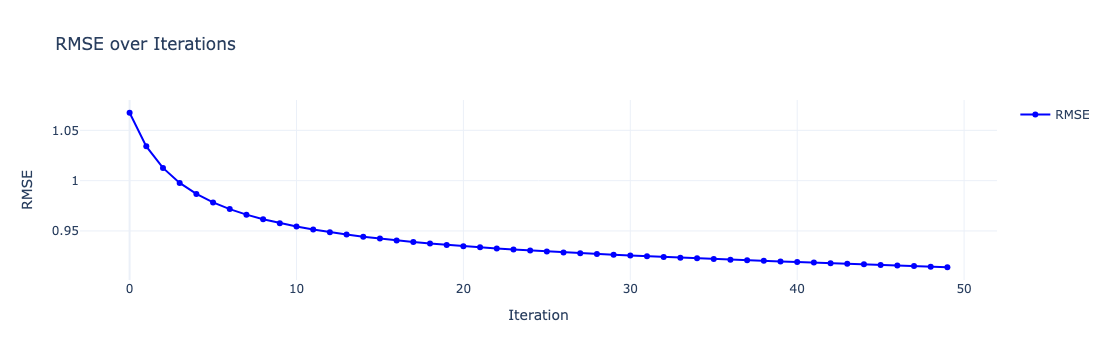

In [70]:
import plotly.graph_objects as go

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Create the plot
fig = go.Figure()

# Add a line plot
fig.add_trace(go.Scatter(
    x=iterations,
    y=errors,
    mode='lines+markers',
    name='RMSE',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Update layout
fig.update_layout(
    title='RMSE over Iterations',
    xaxis_title='Iteration',
    yaxis_title='RMSE',
    template='plotly_white',
    showlegend=True
)

# Show the plot
fig.show()


### To improve the scores of our Matrix Factorization model, we are tune the following parameters:

Number of Latent Factors (K): Experimenting with different values for the latent features between 10 and 100.

Learning Rate (alpha): Adjusting the learning rate between 0.0001 and 0.01 to ensure the model converges appropriately. 

Regularization Parameter (beta): Modifying the regularization parameter from 0.001 to 0.1 to prevent overfitting.

Number of Iterations: Increasing or decreasing the number of iterations between 50 to 100 based on the convergence behavior of the model.


### Hyper-parameter tuning

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        # Initialize the MatrixFactorization model
        self.R = R  # User-item rating matrix
        self.num_users, self.num_items = R.shape  # Number of users and items
        self.K = K  # Number of latent factors
        self.alpha = alpha  # Learning rate
        self.beta = beta  # Regularization parameter
        self.iterations = iterations  # Number of iterations

    def train(self):
        # Initialize user and item latent feature matrices with random values
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize biases
        self.b_u = np.zeros(self.num_users)  # User biases
        self.b_i = np.zeros(self.num_items)  # Item biases
        self.b = np.mean(self.R[np.where(self.R != 0)])  # Global bias

        # Create a list of known ratings
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training process
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()  # Perform stochastic gradient descent
            rmse = self.rmse()  # Compute RMSE
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        # Perform stochastic gradient descent
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)  # Predicted rating
            e = (r - prediction)  # Prediction error

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        # Compute predicted rating
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        # Compute RMSE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        # Compute MAE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def precision_recall_f1(self, threshold=3.5):
        # Compute Precision, Recall, and F1-Score
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix

        y_true = []
        y_pred = []

        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        return precision, recall, f1

    def full_matrix(self):
        # Compute full predicted ratings matrix
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + self.P.dot(self.Q.T)


# R is already defined as the user-item rating matrix
mf = MatrixFactorization(R, K=50, alpha=0.01, beta=0.01, iterations=100) #did some hyper parameter tuning
training_process = mf.train()

# Evaluate the model
rmse = mf.rmse()
mae = mf.mae()
precision, recall, f1 = mf.precision_recall_f1()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Iteration: 1 ; error = 0.9589
Iteration: 2 ; error = 0.9382
Iteration: 3 ; error = 0.9293
Iteration: 4 ; error = 0.9239
Iteration: 5 ; error = 0.9199
Iteration: 6 ; error = 0.9162
Iteration: 7 ; error = 0.9117
Iteration: 8 ; error = 0.9053
Iteration: 9 ; error = 0.8957
Iteration: 10 ; error = 0.8823
Iteration: 11 ; error = 0.8660
Iteration: 12 ; error = 0.8477
Iteration: 13 ; error = 0.8274
Iteration: 14 ; error = 0.8053
Iteration: 15 ; error = 0.7824
Iteration: 16 ; error = 0.7581
Iteration: 17 ; error = 0.7335
Iteration: 18 ; error = 0.7092
Iteration: 19 ; error = 0.6850
Iteration: 20 ; error = 0.6615
Iteration: 21 ; error = 0.6391
Iteration: 22 ; error = 0.6177
Iteration: 23 ; error = 0.5976
Iteration: 24 ; error = 0.5787
Iteration: 25 ; error = 0.5610
Iteration: 26 ; error = 0.5446
Iteration: 27 ; error = 0.5295
Iteration: 28 ; error = 0.5153
Iteration: 29 ; error = 0.5024
Iteration: 30 ; error = 0.4905
Iteration: 31 ; error = 0.4794
Iteration: 32 ; error = 0.4691
Iteration: 33 ; e

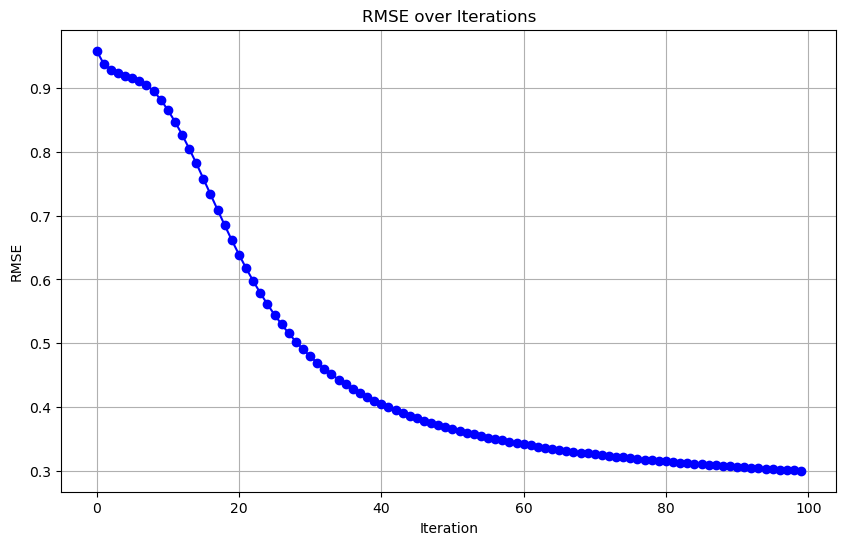

In [72]:
import matplotlib.pyplot as plt

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Plot RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations')
plt.grid(True)
plt.show()


## With this parameters : - 

K (Number of latent factors): 50

alpha (Learning rate): 0.01

beta (Regularization parameter): 0.01

iterations: 100

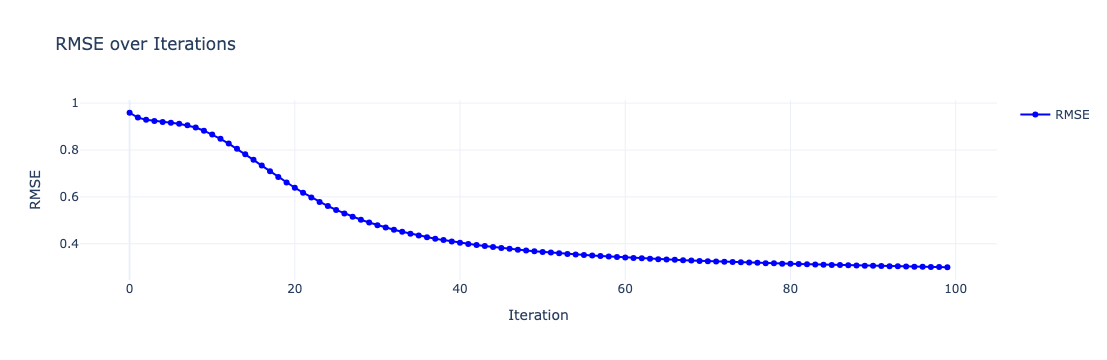

In [73]:
import plotly.graph_objects as go

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Create the plot
fig = go.Figure()

# Add a line plot
fig.add_trace(go.Scatter(
    x=iterations,
    y=errors,
    mode='lines+markers',
    name='RMSE',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Update layout
fig.update_layout(
    title='RMSE over Iterations',
    xaxis_title='Iteration',
    yaxis_title='RMSE',
    template='plotly_white',
    showlegend=True
)

# Show the plot
fig.show()


## We are getting this scores : - 

RMSE: 0.2998

MAE: 0.2226

Precision: 0.9660

Recall: 0.9708

F1-Score: 0.9684

### These scores suggest that our model is performing quite well

### Printing the full predicted ratings matrix

In [74]:

predicted_ratings = mf.full_matrix()

# Display the full predicted ratings matrix
print("Full Predicted Ratings Matrix:")
print(predicted_ratings)

# Get predictions for specific user-item pairs
# For example, to get the prediction for user 0 and item 0
user_id = 1
item_id = 6
predicted_rating = mf.get_rating(user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id}: {predicted_rating:.4f}")

# Display predictions for the first 5 users and items
print("Predicted Ratings for the first 5 users and items:")
for user_id in range(5):
    for item_id in range(5):
        print(f"User {user_id} - Item {item_id}: {mf.get_rating(user_id, item_id):.4f}")


Full Predicted Ratings Matrix:
[[4.23120274 3.47046323 4.1416483  ... 3.13560263 3.50024867 3.27597337]
 [3.97818939 2.48813318 1.02787263 ... 3.23166499 3.60108502 3.5524115 ]
 [3.065712   1.28467866 3.29954683 ... 2.40405072 2.76339064 2.69598041]
 ...
 [4.91414915 3.30473889 3.66344333 ... 3.42994612 3.74553609 3.60913776]
 [3.79804859 3.53167126 3.95118042 ... 3.65019779 3.90039846 3.82843339]
 [2.64131322 4.49067304 2.98345099 ... 2.75711892 3.3218612  3.08281145]]
Predicted rating for user 1 and item 6: 3.3381
Predicted Ratings for the first 5 users and items:
User 0 - Item 0: 4.2312
User 0 - Item 1: 3.4705
User 0 - Item 2: 4.1416
User 0 - Item 3: 3.4137
User 0 - Item 4: 3.0693
User 1 - Item 0: 3.9782
User 1 - Item 1: 2.4881
User 1 - Item 2: 1.0279
User 1 - Item 3: 3.6549
User 1 - Item 4: 3.2899
User 2 - Item 0: 3.0657
User 2 - Item 1: 1.2847
User 2 - Item 2: 3.2995
User 2 - Item 3: 2.8125
User 2 - Item 4: 2.5699
User 3 - Item 0: 5.7893
User 3 - Item 1: 3.8766
User 3 - Item 2: 3.

## Printing the User-Item Matrix with Predicted Ratings

In [75]:
# Get the full predicted ratings matrix
predicted_ratings = mf.full_matrix()

# Replace the zeros in the original matrix with the predicted ratings
completed_matrix = R.copy()
completed_matrix[completed_matrix == 0] = predicted_ratings[completed_matrix == 0]

# Convert to DataFrame for better readability
completed_matrix_df = pd.DataFrame(completed_matrix, columns=[f'Item {i+1}' for i in range(num_items)], index=[f'User {i+1}' for i in range(num_users)])

print("Completed User-Item Matrix with Predicted Ratings:")
print(completed_matrix_df)

Completed User-Item Matrix with Predicted Ratings:
            Item 1    Item 2    Item 3    Item 4    Item 5    Item 6  \
User 1    5.000000  3.000000  4.000000  3.000000  3.000000  5.000000   
User 2    4.000000  2.488133  1.027873  3.654863  3.289871  5.256218   
User 3    3.065712  1.284679  3.299547  2.812457  2.569885  3.167702   
User 4    5.789298  3.876607  3.943820  3.495348  3.768437  5.582695   
User 5    4.000000  3.000000  3.301281  3.671915  1.406657  2.396857   
...            ...       ...       ...       ...       ...       ...   
User 939  5.701283  4.323527  4.188329  3.912037  5.374233  5.346306   
User 940  4.951378  4.444799  1.357235  2.000000  4.667230  2.658622   
User 941  5.000000  3.304739  3.663443  3.622037  4.048918  4.967722   
User 942  3.798049  3.531671  3.951180  4.679626  3.355354  4.082726   
User 943  2.641313  5.000000  2.983451  4.076844  4.091099  1.626026   

            Item 7    Item 8    Item 9   Item 10  ...  Item 1673  Item 1674  \
User 

## --------------------------------------------------------------------------------------------------

# Part : - 2 

# Building the Hybrid Recommender System

In [93]:
pip install nltk



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install IMDbPY


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 9.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [76]:
u_item = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')

In [77]:
u_item = u_item.drop('video_release_date', axis=1)
u_item.head(20)

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Extracting the Tag words from movie_title column

In [78]:
# Extract just the movie name from the movie_title column
u_item['movie_tag_word'] = u_item['movie_title'].str.extract(r'^(.*?)(?:\s\(\d{4}\))?$')
new_u_item = u_item
new_u_item.to_csv('new_u_item.csv', index=False)
# Display the first 20 rows to verify
new_u_item.head(20)

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_tag_word
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,Toy Story
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,GoldenEye
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Four Rooms
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Get Shorty
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Copycat
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shanghai Triad (Yao a yao yao dao waipo qiao)
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Twelve Monkeys
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Babe
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dead Man Walking
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Richard III


In [119]:
new_u_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_id        1682 non-null   int64 
 1   movie_title     1682 non-null   object
 2   release_date    1681 non-null   object
 3   IMDb_URL        1679 non-null   object
 4   unknown         1682 non-null   int64 
 5   Action          1682 non-null   int64 
 6   Adventure       1682 non-null   int64 
 7   Animation       1682 non-null   int64 
 8   Children's      1682 non-null   int64 
 9   Comedy          1682 non-null   int64 
 10  Crime           1682 non-null   int64 
 11  Documentary     1682 non-null   int64 
 12  Drama           1682 non-null   int64 
 13  Fantasy         1682 non-null   int64 
 14  Film-Noir       1682 non-null   int64 
 15  Horror          1682 non-null   int64 
 16  Musical         1682 non-null   int64 
 17  Mystery         1682 non-null   int64 
 18  Romance 

### Fetching the 20 comments for each movie tag word using parallel fetching for sentiment scores 

In [92]:
import pandas as pd
from imdb import IMDb
from concurrent.futures import ThreadPoolExecutor

# Initialize IMDb instance
ia = IMDb()

# Load your dataset
df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/new_u_item.csv')

# Function to fetch comments from IMDb
def fetch_imdb_comments(movie_tag_word, count=20):
    try:
        # Search for the movie
        movies = ia.search_movie(movie_tag_word)
        if not movies:
            return []

        # Get the first matching movie
        movie = movies[0]
        ia.update(movie, 'reviews')

        # Extract comments
        comments = []
        for review in movie.get('reviews', [])[:count]:
            comments.append(review['content'])
        return [{'movie_tag_word': movie_tag_word, 'comment': comment} for comment in comments]
    except Exception as e:
        print(f"Error fetching comments for {movie_tag_word}: {e}")
        return []

# Function to fetch comments in parallel
def fetch_all_comments(df):
    comments_list = []
    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = [executor.submit(fetch_imdb_comments, tag) for tag in df['movie_tag_word']]
        for future in futures:
            result = future.result()
            if result:
                comments_list.extend(result)
    return comments_list

# Fetch comments for each movie tag word in parallel
comments_list = fetch_all_comments(df)

# Convert list to DataFrame
comments_df = pd.DataFrame(comments_list)

# Save the comments to a new CSV file
comments_df.to_csv('movie_comments.csv', index=False)
print("Comments fetched and saved to movie_comments.csv")


Comments fetched and saved to movie_comments.csv


In [105]:
df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/movie_comments.csv')
# Find unique values in the 'movie_tag_word' column
unique_values = df['movie_tag_word'].nunique()
unique_values

1592

### Performing sentiment analysis 

In [95]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initialize stopwords and sentiment analyzer
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

# Function to clean comments
def clean_comment(comment):
    comment = re.sub(r'\s+', ' ', comment)  # Remove extra spaces
    comment = re.sub(r'\W', ' ', comment)   # Remove special characters
    comment = re.sub(r'\d', ' ', comment)   # Remove digits
    comment = comment.lower()               # Convert to lowercase
    comment = ' '.join(word for word in comment.split() if word not in stop_words)
    return comment

# Function to perform sentiment analysis
def analyze_sentiment(comment):
    sentiment_score = sid.polarity_scores(comment)['compound']
    return sentiment_score

# Load the dataset with fetched comments
comments_df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/movie_comments.csv')

# Clean the comments and perform sentiment analysis
comments_df['cleaned_comment'] = comments_df['comment'].apply(clean_comment)
comments_df['sentiment_score'] = comments_df['cleaned_comment'].apply(analyze_sentiment)

# Calculate the average sentiment score for each movie tag word
average_sentiment_df = comments_df.groupby('movie_tag_word')['sentiment_score'].mean().reset_index()
average_sentiment_df.columns = ['movie_tag_word', 'average_sentiment_score']

# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
average_sentiment_df['sentiment_category'] = average_sentiment_df['average_sentiment_score'].apply(categorize_sentiment)

# Save the cleaned comments and average sentiment scores to a new CSV file
average_sentiment_df.to_csv('average_movie_sentiment.csv', index=False)

print("Sentiment analysis completed and results saved to average_movie_sentiment.csv")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment analysis completed and results saved to average_movie_sentiment.csv


In [107]:
df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/average_movie_sentiment.csv')
df.head(20)

,movie_tag_word,average_sentiment_score,sentiment_category
0,'Til There Was You,0.556260,Positive
1,1-900,0.140200,Positive
2,101 Dalmatians,0.809875,Positive
3,12 Angry Men,0.458725,Positive
4,2 Days in the Valley,0.386165,Positive
5,"20,000 Leagues Under the Sea",0.816695,Positive
6,2001: A Space Odyssey,0.677960,Positive
7,3 Ninjas: High Noon At Mega Mountain,-0.283470,Negative
8,"39 Steps, The",0.853275,Positive
9,8 1/2,0.811120,Positive


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_tag_word           1592 non-null   object 
 1   average_sentiment_score  1592 non-null   float64
 2   sentiment_category       1592 non-null   object 
dtypes: float64(1), object(2)
memory usage: 37.4+ KB


### From the above cell we can observe that our number of entries has been dropped from 1682 to 1592 in order to find out the missing entries 
### Lets merge the CSV files by taking movie_tag_word as common column

In [114]:
import pandas as pd

# Load the datasets
u_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/new_u_item.csv')
average_sentiment_df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/average_movie_sentiment.csv')

# Merge the datasets on the movie_tag_word column
merged_data = pd.merge(u_data, average_sentiment_df, on='movie_tag_word', how='left')

# Save the merged data to a new CSV file
merged_data.to_csv('merged_dataset.csv', index=False)

# Display the merged DataFrame
print(merged_data.head())


   movie_id        movie_title release_date  \
0         1   Toy Story (1995)  01-Jan-1995   
1         2   GoldenEye (1995)  01-Jan-1995   
2         3  Four Rooms (1995)  01-Jan-1995   
3         4  Get Shorty (1995)  01-Jan-1995   
4         5     Copycat (1995)  01-Jan-1995   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  Comedy  ...  Musical  Mystery  Romance  \
0          0          1           1       1  ...        0        0        0   
1          1          0           0       0  ...        0        0        0   
2          0          0           0      

### Printing the list movies without an average sentiment score (Missing Entries)

In [118]:
missing_sentiment_movies = merged_data[merged_data['average_sentiment_score'].isna()]['movie_title'].unique()

# Print the list of movies without average sentiment scores
print("Movies without average sentiment scores:")
for movie in missing_sentiment_movies:
    print(movie)

Movies without average sentiment scores:
Seven (Se7en) (1995)
French Twist (Gazon maudit) (1995)
Eat Drink Man Woman (1994)
Crow, The (1994)
Wallace & Gromit: The Best of Aardman Animation (1996)
Monty Python's Life of Brian (1979)
Good, The Bad and The Ugly, The (1966)
Alien (1979)
Nikita (La Femme Nikita) (1990)
When the Cats Away (Chacun cherche son chat) (1996)
unknown
187 (1997)
Tales From the Crypt Presents: Demon Knight (1995)
Tales from the Crypt Presents: Bordello of Blood (1996)
Like Water For Chocolate (Como agua para chocolate) (1992)
My Life as a Dog (Mitt liv som hund) (1985)
Police Story 4: Project S (Chao ji ji hua) (1993)
Daniel Defoe's Robinson Crusoe (1996)
Spellbound (1945)
Once Upon a Time in the West (1969)
Alien 3 (1992)
I Know What You Did Last Summer (1997)
Wonderful, Horrible Life of Leni Riefenstahl, The (1993)
Burnt By the Sun (1994)
Roommates (1995)
In the Line of Duty 2 (1987)
Two or Three Things I Know About Her (1966)
Michael (1996)
Ma vie en rose (My Li